In [ ]:
# !pip install -U scikit-learn

In [40]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  \
DATE                                                                            
31DEC19  KOR    NaN  31DEC19    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
01JAN20  KOR    NaN  01JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
02JAN20  KOR    NaN  02JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
03JAN20  KOR    NaN  03JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
04JAN20  KOR    NaN  04JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   

         OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                     
31DEC19     NaN     NaN     NaN     NaN     NaN     NaN  
01JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
02JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
03JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
04JAN20     0.0     0.0     0.0     0.0     0.0     0.0

In [41]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [42]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  \
DATE                                                                       
23JAN20  KOR    1.0 2020-01-23    0.0    0.0    1.0    0.0    0.0    0.0   
24JAN20  KOR    2.0 2020-01-24    0.0    0.0    2.0    0.0    0.0    0.0   
25JAN20  KOR    2.0 2020-01-25    0.0    0.0    2.0    0.0    0.0    0.0   
26JAN20  KOR    3.0 2020-01-26    0.0    0.0    3.0    0.0    0.0    0.0   
27JAN20  KOR    4.0 2020-01-27    0.0    0.0    4.0    0.0    0.0    0.0   

         OVAR7  OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                            
23JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
24JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
26JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
27JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [43]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "MVAR1", "MVAR2", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR3  MVAR4
DATE                 
23JAN20    0.0    1.0
24JAN20    0.0    2.0
25JAN20    0.0    2.0
26JAN20    0.0    3.0
27JAN20    0.0    4.0

In [44]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [13, 8]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1
plt.savefig('2_variables_GraphV11.png')
pyplot.show()

### **LSTM DATA PREPARATION**

In [45]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 2)


In [46]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 2
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
# reframed.drop(reframed.columns[[51,52,53,54,55,56,57,58,59]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[61,62,63,64,65,66,67,68,69,70,71]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[85,86,87,88,89,90,91,92,93,94,95]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[99,100,101,102,103,104,105,106,107,108,109,110,111]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 8)


In [47]:
reframed.head()

var1(t-3)  var2(t-3)  var1(t-2)  var2(t-2)  var1(t-1)  var2(t-1)  var1(t)  \
3       -1.0  -1.000000       -1.0  -0.999889       -1.0  -0.999889     -1.0   
4       -1.0  -0.999889       -1.0  -0.999889       -1.0  -0.999779     -1.0   
5       -1.0  -0.999889       -1.0  -0.999779       -1.0  -0.999668     -1.0   
6       -1.0  -0.999779       -1.0  -0.999668       -1.0  -0.999668     -1.0   
7       -1.0  -0.999668       -1.0  -0.999668       -1.0  -0.999668     -1.0   

    var2(t)  
3 -0.999779  
4 -0.999668  
5 -0.999668  
6 -0.999668  
7 -0.999668

In [48]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (400, 8)
Testing data shape:  (134, 8)


In [49]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -2:]
test_X, test_y = test[:, :n_obs], test[:, -2:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

6
Training split shape:  (400, 6) 400 (400, 2)
Testing split shape:  (134, 6) 134 (134, 2)


In [50]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 2) (400, 2) (134, 3, 2) (134, 2)


**Perfect Model below**

In [ ]:
# model = Sequential()
# model.add(Bidirectional(LSTM(164, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# # model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh'), merge_mode="concat"))

# model.add(Bidirectional(LSTM(124, return_sequences=False, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# # 1st layer 164, 2nd layer 124

# # model.add(LSTM(32, activation="tanh"))
# model.add(Dense(train_y.shape[1]))

# adam = tf.keras.optimizers.Adam()
# ear_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=100,  # best is 100
#     mode='min', restore_best_weights=True
# )
# # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=30)  # factor is 0.2 or 0.3
# model.compile(loss=tf.losses.MeanAbsoluteError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)
# # model.compile(loss=tf.losses.MeanSquaredError(),
# #               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

# history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=True)  # batch_size = 82 best and 108

Epoch 1/4500
4/4 - 7s - loss: 0.6424 - mean_absolute_error: 0.6424 - val_loss: 0.3849 - val_mean_absolute_error: 0.3849
Epoch 2/4500
4/4 - 0s - loss: 0.2984 - mean_absolute_error: 0.2984 - val_loss: 0.2704 - val_mean_absolute_error: 0.2704
Epoch 3/4500
4/4 - 0s - loss: 0.1702 - mean_absolute_error: 0.1702 - val_loss: 0.2461 - val_mean_absolute_error: 0.2461
Epoch 4/4500
4/4 - 0s - loss: 0.0949 - mean_absolute_error: 0.0949 - val_loss: 0.2576 - val_mean_absolute_error: 0.2576
Epoch 5/4500
4/4 - 0s - loss: 0.0946 - mean_absolute_error: 0.0946 - val_loss: 0.2222 - val_mean_absolute_error: 0.2222
Epoch 6/4500
4/4 - 0s - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.2040 - val_mean_absolute_error: 0.2040
Epoch 7/4500
4/4 - 0s - loss: 0.0564 - mean_absolute_error: 0.0564 - val_loss: 0.1863 - val_mean_absolute_error: 0.1863
Epoch 8/4500
4/4 - 0s - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.1506 - val_mean_absolute_error: 0.1506
Epoch 9/4500
4/4 - 0s - loss: 0.0329 - m

In [51]:
# model.save('/content/drive/MyDrive/Korea university work/publication/2variables_rmse_324')
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/2variables_rmse_324')

In [52]:
# # plot history

# pyplot.figure()
# pyplot.rcParams['figure.figsize'] = [7, 6]
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [53]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 6)
yhat :  (134, 2)


In [54]:
inv_yhat = scaler.inverse_transform(yhat)

In [55]:
test_y = test_y.reshape((len(test_y), 2))
inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 324  .....> originally 356 hai

Test RMSE: 3495.743


In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 1], color='tab:orange', label='Predicted Positive rate')
ax.plot(dd, inv_y[:, 1], color='tab:red', label='Original Positive rate')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('positive rate')
ax.set_title('Positive rate Data')
ax.grid(True)
ax.legend(loc='upper left');

### **Fitting model on training data**

In [ ]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)

(400, 6)


In [ ]:
inv_yhat_train = scaler.inverse_transform(yhat_train)

train_y = train_y.reshape((len(train_y), 2))
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('train RMSE: %.3f' % rmse)

train RMSE: 419.811


# Combining both training and test data

In [ ]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 2)

In [ ]:
L44 = ["Predicted New Cases", "Original Positive Cases", "Predicted Death Cases", "Original Death Cases", "Predicted New Recovered Cases", "Original Recovered Cases", "Predicted New Quarantined Cases", "Original Quarantined Cases"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

# L22 = ["Predicted New Recovered Cases", "Original Recovered Cases", "Predicted New Quarantined Cases", "Original Quarantined Cases"]
# L21 = ["Recovered Patient Data", "No of People Quarantined"]

L22 = ["Predicted New Cases", "Predicted New Death Cases"]
L20 = ["Original Positive Cases", "Original Death Cases"]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data"]


# L22 = ["Predicted New Cases", "Original Positive Cases", "Predicted New Death Cases", "Original Death Cases"]
# L21 = ["Positive rate Data", "Death rate Data"]

# L22 = ["Predicted New Death Cases",  "Predicted New Recovered Cases"]
# L20 = ["Original Death Cases", "Original Recovered Cases"]
# L21 = ["Death rate Data", "Recovered Patient Data" ]

# L22 = ["Predicted New Cases", "Predicted New Quarantined Cases"]
# L20 = ["Original Positive Cases", "Original Quarantined Cases"]
# L21 = [ "Corona Positive Cases Data", "No of People Quarantined" ]

# L22 = ["Predicted New Recovered Cases", "Predicted New Quarantined Cases"]
# L20 = ["Original Recovered Cases", "Original Quarantined Cases"]
# L21 = ["Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]



In [ ]:
plt.rc('font', size=10)
fig, ax = plt.subplots(2, figsize=(15, 14))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
for i in range(2):
  ax[i].plot(comb_p[:, i],color='tab:red', label=L22[i], linestyle='dashed', linewidth=7)
  ax[i].plot(comb_d[:, i], color='tab:green', label=L20[i], linewidth=3)

  # Same as above
  ax[i].set_xlabel('Days')
  ax[i].set_ylabel('Total cases')
  ax[i].set_title(L21[i])
  ax[i].grid(True)
  ax[i].legend(loc='upper left');

plt.savefig('2_variables_out_resultsV4.png')

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.117301956
Total Error MAE:  3084.4944
Error in percentage MAPE: 2.184345
Total Error MAPE:  0.105149426
Test RMSE: 3495.743


In [62]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error
mae = MAE(inv_yhat[:, 0], inv_y[:, 0])
print("Total Error MAE: ", mae)

Total Error MAE:  4584.4844


In [58]:
rmse = sqrt(mean_squared_error(inv_y[:, 1], inv_yhat[:, 1]))
print('Test RMSE: %.2f' % rmse)

Test RMSE: 1637.72


In [63]:
mape = mean_absolute_percentage_error(inv_yhat[:, 0], inv_y[:, 0])
print("Total Error MAPE: ", mape)

Total Error MAPE:  0.037855938


In [ ]:
# 1
# Error in percentage MAE: 0.117301956
# Total Error MAE:  3084.4944
# Error in percentage MAPE: 2.184345
# Total Error MAPE:  0.105149426
# Test RMSE: 3495.743

# 2
# Error in percentage MAE: 0.049798507
# Total Error MAE:  312.44324
# Error in percentage MAPE: 0.062089592
# Total Error MAPE:  0.02633025
# Test RMSE: 412.435


**New Method and correct one**

In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=25)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=4)
ax2.plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel("Positive Cases")
ax1.set_title(L21[0])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel("Death Cases")
ax2.set_title(L21[1])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("2_var_out_1.png",dpi=300)

In [ ]:
L44 = ["Predicted New Cases", "Original Positive Cases", "Predicted Death Cases", "Original Death Cases", "Predicted New Recovered Cases", "Original Recovered Cases", "Predicted New Quarantined Cases", "Original Quarantined Cases"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]


# L22 = ["Predicted New Cases", "Predicted New Death Cases"]
# L20 = ["Original Positive Cases", "Original Death Cases"]
# L21 = ["Corona Positive Cases Data", "Corona Death Cases Data"]


# L22 = ["Predicted New Cases", "Original Positive Cases", "Predicted New Death Cases", "Original Death Cases"]
# L21 = ["Positive rate Data", "Death rate Data"]

# L22 = ["Predicted New Death Cases",  "Predicted New Recovered Cases"]
# L20 = ["Original Death Cases", "Original Recovered Cases"]
# L21 = ["Death rate Data", "Recovered Patient Data" ]

# L22 = ["Predicted New Cases", "Predicted New Quarantined Cases"]
# L20 = ["Original Positive Cases", "Original Quarantined Cases"]
# L21 = [ "Corona Positive Cases Data", "No of People Quarantined" ]

L22 = ["Predicted New Recovered Cases", "Predicted New Quarantined \n                Cases"]
L20 = ["Original Recovered Cases", "Original Quarantined Cases"]
L21 = ["Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]



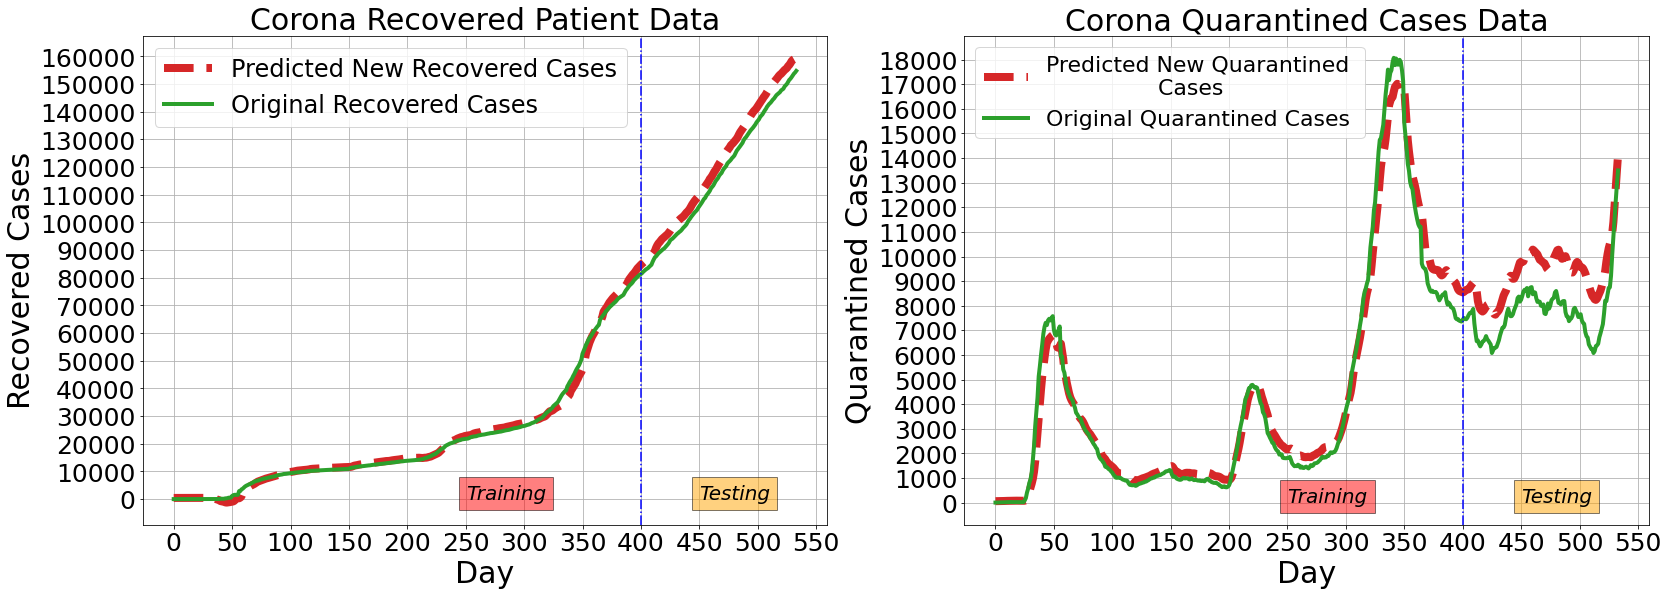

In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=24)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=4)
ax2.plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
# ax1.set_ylabel("Positive Cases")
ax1.set_ylabel("Recovered Cases")
ax1.set_title(L21[0])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 22})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

ax2.set_xlabel('Day')
ax2.set_ylabel("Quarantined Cases")
ax2.set_title(L21[1])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("2_var_out_2.png",dpi=300)